http://www.face-rec.org/algorithms/PCA/jcn.pdf
    
http://www.vision.jhu.edu/teaching/vision08/Handouts/case_study_pca1.pdf

In [1]:
# Import library / packages

# For numerical operation
import numpy as np

# For plots
from matplotlib import pyplot as plt

# Train-test split
from sklearn.model_selection import train_test_split

# For PCA
from sklearn.decomposition import PCA

# K-Nearest Neighbour
from sklearn.neighbors import NearestNeighbors

In [2]:
# Load the faces
faces_image = np.load('Faces\\olivetti_faces.npy')
faces_target = np.load('Faces\\olivetti_faces_target.npy')

# Find the dimension
faces_image.shape, faces_target.shape

((400, 64, 64), (400,))

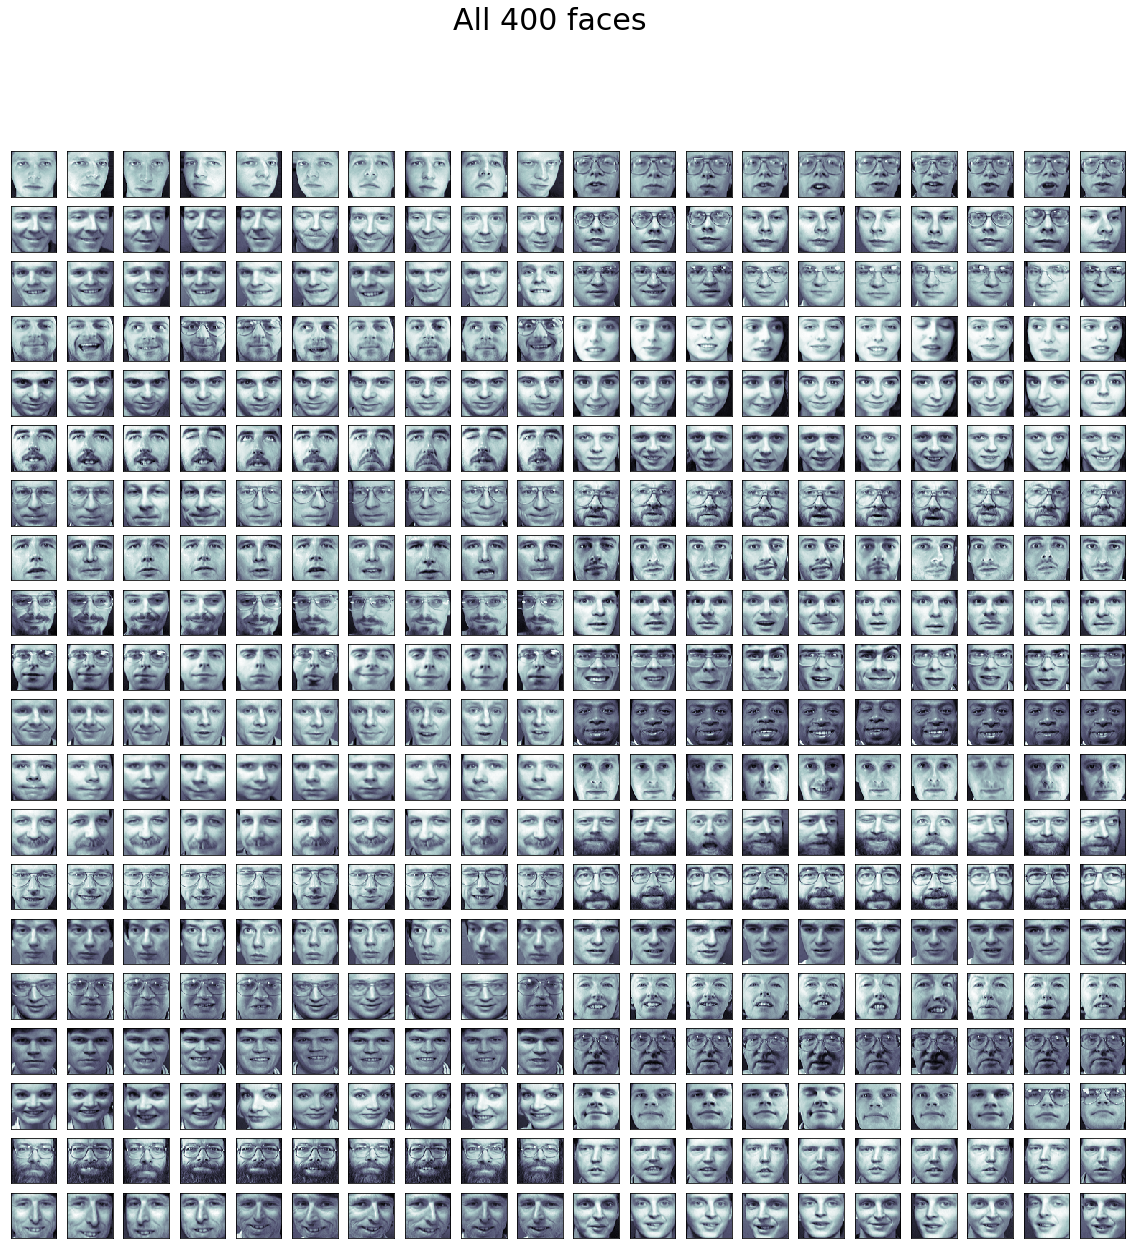

In [3]:
# View all the 400 faces
fig, axes = plt.subplots(20,20,figsize=(20,20),\
                        subplot_kw = {'xticks':[],'yticks':[]})

plt.suptitle('All 400 faces', fontsize = 30)

for i, ax in enumerate(axes.flat) :
    ax.imshow(faces_image[i,:,:].reshape(64,64), cmap = 'bone')

In [4]:
# Split the train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(faces_image.reshape(400,-1), faces_target.reshape(400,1),\
                                                    stratify = faces_target, test_size = 0.30)

In [5]:
# Find all Principal Components
max_features = 200
pca = PCA(n_components=max_features)
Weight_train = pca.fit_transform(X_train)
Weight_test = pca.transform(X_test)

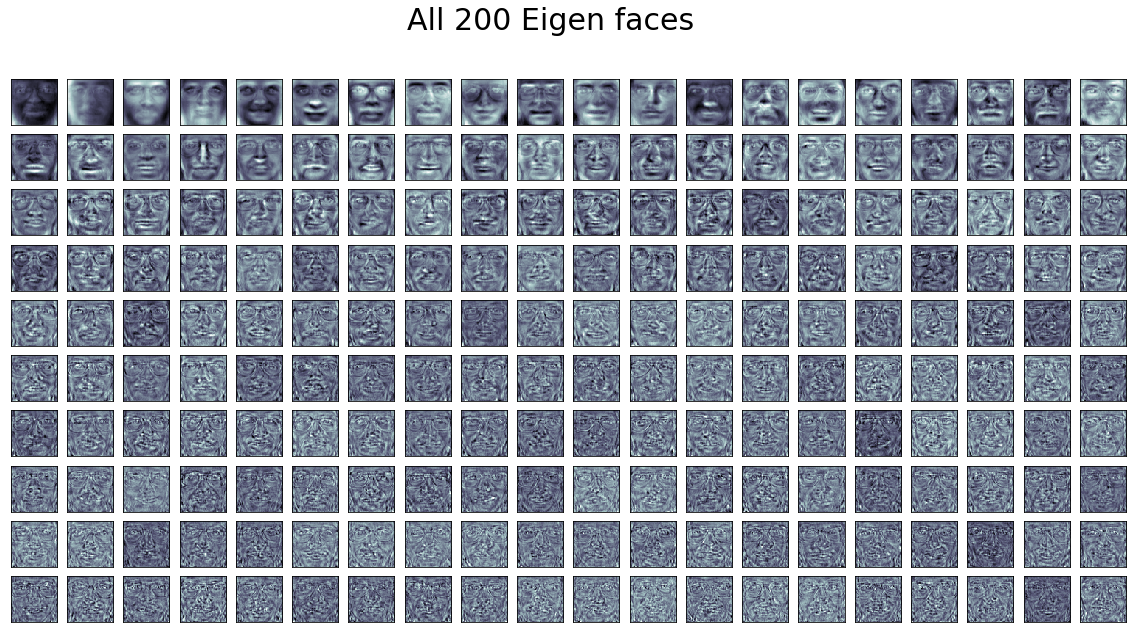

In [6]:
# View all the 200 Eigen faces
fig, axes = plt.subplots(10,20,figsize=(20,10),\
                        subplot_kw = {'xticks':[],'yticks':[]})

plt.suptitle('All 200 Eigen faces', fontsize = 30)

for i, ax in enumerate(axes.flat) :
    ax.imshow(pca.components_[i,:].reshape(64,64), cmap = 'bone')

In [89]:
# Find average training weights
Train_weights = np.hstack((Y_train.reshape(-1,1),Weight_train))
Train_weights.sort(axis = 0)
Train_eigenval = pca.explained_variance_

Train_avg_weight = dict()
for face_id in np.unique(Y_train) :
    Train_avg_weight[face_id] = np.mean(Train_weights[Train_weights[:,0] == face_id,1:],axis=0, keepdims=True)
    

In [91]:
# Calculate distance between like and unlike faces
distances = np.empty((0,4))
for face_id in np.unique(Y_train):
    for weights in Train_weights :
        eu_distance = np.linalg.norm(weights[1:] - Train_avg_weight[face_id])
        mh_distance = np.linalg.norm((weights[1:]/Train_eigenval) - (Train_avg_weight[face_id]/Train_eigenval))
        distances= np.append(distances, [[face_id, weights[0], eu_distance, mh_distance]],axis=0)
    
    

In [108]:
# Find average training weights
Train_min_eu_weight = dict()
Train_min_eu_face = dict()
for face_id in np.unique(Y_train) :
    Train_min_eu_weight[face_id] = np.min(distances[distances[:,1] == face_id,1:],axis=0, keepdims=True)
    Train_min_eu_face[face_id] = distances[(distances[:,1] == face_id) & \
                                           (distances[:,2] == Train_min_eu_weight[face_id]),0]
    
    #Train_min_eu_weight[face_id] = np.min(distances[distances[:,1] == face_id,1:],axis=0, keepdims=True)

C:\Users\acer\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  


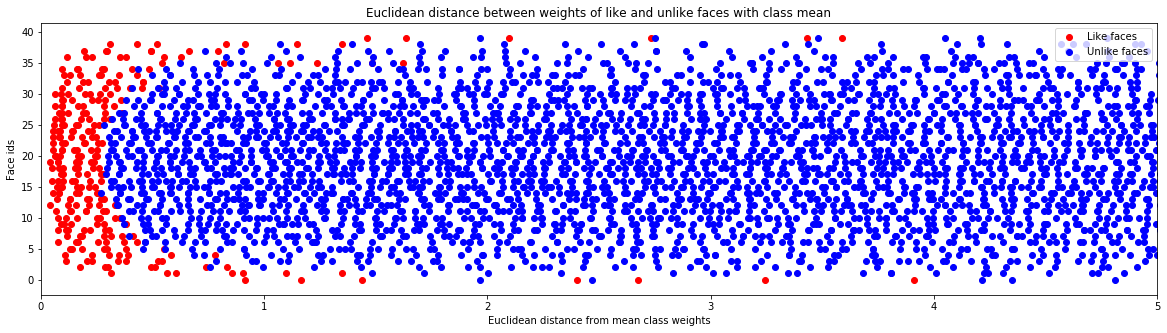

In [101]:
# Plot the distances
plt.figure(figsize=(20,5))
data_cat = ['red' if x == 1 else 'blue' for x in np.array([distances[:,0] == distances[:,1]]).reshape(-1)]
data_cat = np.array([distances[:,0] == distances[:,1]]).reshape(-1)
same_cat = np.array([data_cat ==1]).reshape(-1)
diff_cat = np.array([data_cat !=1]).reshape(-1)
plt.scatter(y= distances[same_cat,1],x= distances[same_cat,2],c = 'red', label = 'Like faces')
plt.scatter(y= distances[diff_cat,1],x= distances[diff_cat,2],c = 'blue', label = 'Unlike faces')
plt.xlim((0,5))
plt.xlabel('Euclidean distance from mean class weights')
plt.ylabel('Face ids')
plt.legend(loc = 'upper right')
plt.title('Euclidean distance between weights of like and unlike faces with class mean')
plt.show()

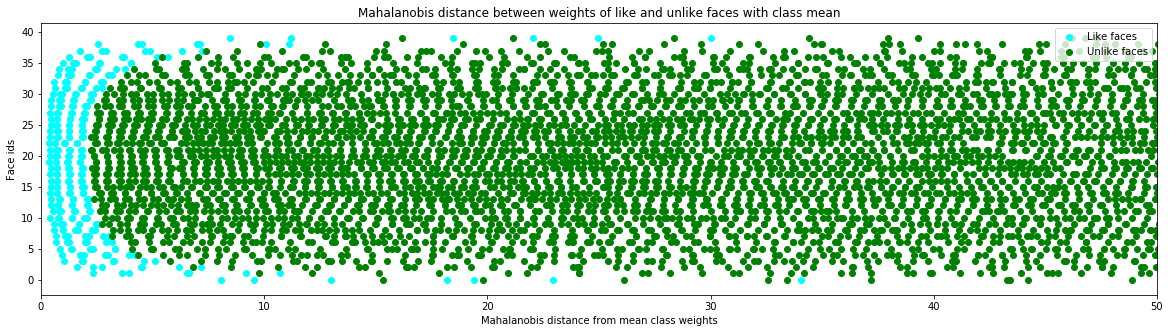

In [99]:
# Plot the distances
plt.figure(figsize=(20,5))
plt.scatter(y= distances[same_cat,1],x= distances[same_cat,3],c = 'cyan', label = 'Like faces')
plt.scatter(y= distances[diff_cat,1],x= distances[diff_cat,3],c = 'green', label = 'Unlike faces')
plt.xlim((0,50))
plt.xlabel('Mahalanobis distance from mean class weights')
plt.ylabel('Face ids')
plt.legend(loc = 'upper right')
plt.title('Mahalanobis distance between weights of like and unlike faces with class mean')
plt.show()